In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
data = pd.read_csv("user_behavior_dataset.csv")

In [116]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [118]:
# null values
data.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [119]:
data = data.rename(columns={"Operating System": "Operating_System"})

In [120]:
data["Device Model"].value_counts()

Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: Device Model, dtype: int64

In [121]:
data["Operating_System"].value_counts()

Android    554
iOS        146
Name: Operating_System, dtype: int64

In [122]:
data["Operating_System"] = data["Operating_System"].astype("category")
data["Device Model"] = data["Device Model"].astype("category")
data["Gender"] = data["Gender"].astype("category")

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   User ID                     700 non-null    int64   
 1   Device Model                700 non-null    category
 2   Operating_System            700 non-null    category
 3   App Usage Time (min/day)    700 non-null    int64   
 4   Screen On Time (hours/day)  700 non-null    float64 
 5   Battery Drain (mAh/day)     700 non-null    int64   
 6   Number of Apps Installed    700 non-null    int64   
 7   Data Usage (MB/day)         700 non-null    int64   
 8   Age                         700 non-null    int64   
 9   Gender                      700 non-null    category
 10  User Behavior Class         700 non-null    int64   
dtypes: category(3), float64(1), int64(7)
memory usage: 46.4 KB


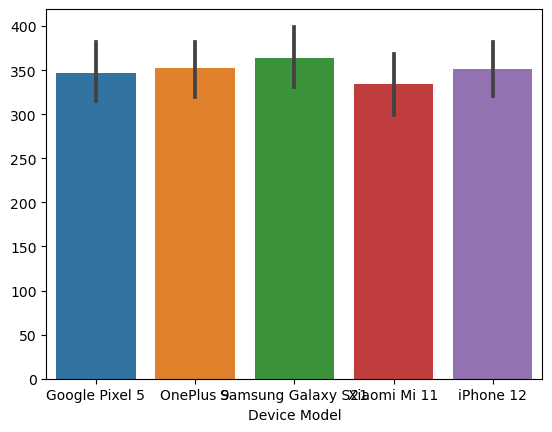

In [124]:
sns.barplot(x="Device Model",y=data["Device Model"].index,data=data);

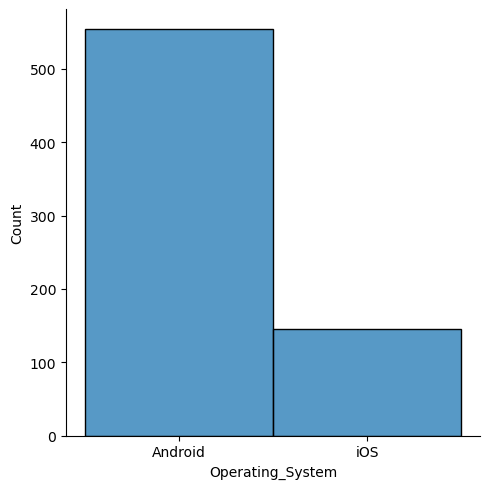

In [125]:
sns.displot(x="Operating_System",data=data);

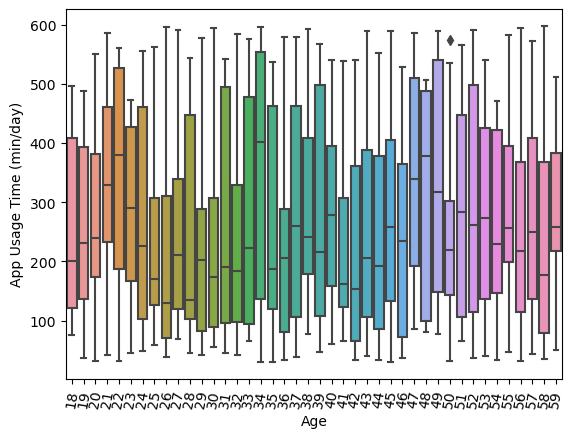

In [126]:
sns.boxplot(x = "Age",y = "App Usage Time (min/day)",data=data);
plt.xticks(rotation=80)
plt.show()

In [127]:
# operating sistemden gidelim
data.Operating_System = [ 1 if each == "Android" else 0 for each in data.Operating_System]

In [128]:
y = data.Operating_System.values
x_data = data.drop(["Operating_System"],axis=1)

In [130]:
#%% normalization
# Kategorik sütunları one-hot encoding ile sayısala çevirme
x_data_encoded = pd.get_dummies(x_data)

# Normalizasyon işlemi
x_normalized = (x_data_encoded - np.min(x_data_encoded)) / (np.max(x_data_encoded) - np.min(x_data_encoded))

C:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x_normalized,y,test_size = 0.15,random_state = 42)

In [133]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("score: ", dt.score(x_test,y_test))

score:  1.0


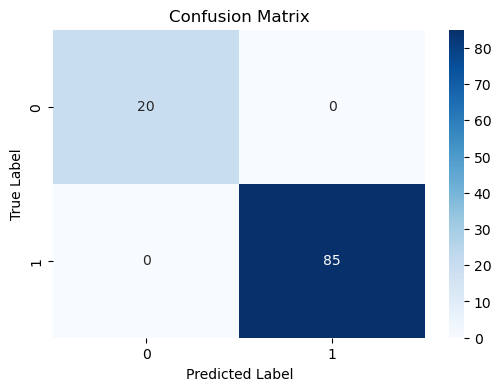

Accuracy:  1.0


In [134]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
# 4. Confusion Matrix'i görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 5. Modelin doğruluk skorunu da yazdırabilirsiniz
print("Accuracy: ", accuracy_score(y_test, y_pred))